# 
calc the distance dependency of the magnetic field and gradient as a function of the distance between the NV plane and the magnet surface
(using parallelization of loops)

In [1]:
from EMstatPy import *
from EMstatPy_plots import *
import json
PARAMETER_FILE ='Magnet.json'

import matplotlib.patches as patches
import matplotlib.pyplot as plt
from numpy import linalg as LA
import numpy as np
import pandas as pd
import os
import datetime

%matplotlib inline

# fontsize of the x any y labels
plt.rcParams.update({'axes.labelsize': 'large'})
target_folder = './calc_results/magnet'

# 2D plots - magnet different length

In [ ]:
target_folder = './calc_results/magnet'

x_positions = np.arange(0.1, 2.55,0.05)

x_positions_plot = np.array([ 0.1,  0.5,  1.0,  1.5,  2.0, 2.5])

margins = {
#     'a1':{'left': -0.1, 'right': 0.1},
    'a1':{'left': -0.1, 'right': 1.0},
    'a2':{'left':1.5, 'right':1.5},
    'a3':{'left':1.5, 'right':1.5},
    'dx': 2e-2
}

config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']


for length in [2.0]:
    
    maxG = []
    area = []
    
    config['magnet_dimensions_um']['length'] = length
    for height in x_positions:
        print('current height',height, '/', x_positions[-1])

        # calculate
        margins.update({'a1':height})
        data, run_time = run_calculation(config, margins, type = 'both', use_parallel = True, verbose = False)
        df = pd.DataFrame.from_dict(data)
        filename = os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um.csv'.format(config['magnet_dimensions_um']['length'], height))
        
        df.to_csv(filename)

        maxG.append(max(np.abs(df['G'])))
        area.append(len(df[np.abs(df['G'])>np.exp(-1)*maxG[-1]])*margins['dx']**2)


        # plot
        if min(abs(height-x_positions_plot))<1e-10:
            for field in ['Bfield_mag', 'Bfield_proj', 'Gradient']:
                print(datetime.datetime.now(), 'saving figure')
                f = plot_fields_in_plane('x', df, height, field, config)
                f.savefig(os.path.join(target_folder, '{:s}_length_{:0.1f}um_x_{:03.0f}nm.jpg'.format(field, config['magnet_dimensions_um']['length'], 1e3*height)))
                
    data = np.array([x_positions, maxG, area])
    filename = os.path.join(target_folder, 'magnet_{:0.1f}um_max_gradient.csv'.format(config['magnet_dimensions_um']['length']))
    np.savetxt(filename,data,delimiter=',')

In [ ]:
data = np.array([x_positions, maxG, area])
filename = os.path.join(target_folder, 'magnet_{:0.1f}um_max_gradient.csv'.format(config['magnet_dimensions_um']['length']))
np.savetxt(filename,data,delimiter=',')

In [13]:
filename = os.path.join(target_folder, 'magnet_{:0.1f}um_max_gradient.csv'.format(config['magnet_dimensions_um']['length']))
filename

'./calc_results/magnet/magnet_2.0um_max_gradient.csv'

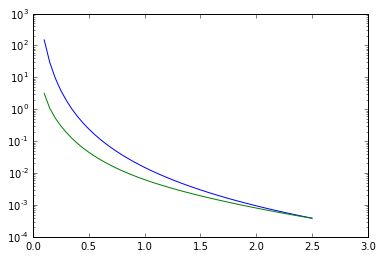

In [14]:
plt.semilogy(np.array(x_positions), 150*0.1**4/np.array(x_positions)**4, label = 'length = {:0.1f}'.format(length))
plt.semilogy(np.array(x_positions), maxG, label = 'length = {:0.1f}'.format(length))

1.0
1.5
2.0


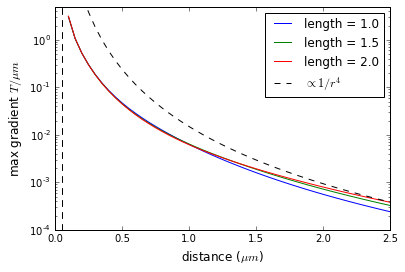

In [17]:
f = plt.figure()
config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']



for length in [1.0, 1.5, 2.0]:
    print(length)
    filename = os.path.join(target_folder, 'magnet_{:0.1f}um_max_gradient.csv'.format(length))
    [x_positions, maxG, area] = np.loadtxt(filename,delimiter=',')

    plt.semilogy(np.array(x_positions), maxG, label = 'length = {:0.1f}'.format(length))
    plt.plot([config['magnet_dimensions_um']['height']/2, config['magnet_dimensions_um']['height']/2], [1e-4, 5], 'k--')
plt.semilogy(np.array(x_positions), 150*0.1**4/np.array(x_positions)**4, 'k--',  label = '$\propto 1/r^4$'.format(length))
plt.xlabel('distance ($\mu m$)')
plt.ylabel('max gradient $T/\mu m$')
plt.legend(loc = 0)
plt.xlim([0, max(x_positions)])
plt.ylim([1e-4,5])
f.savefig(os.path.join(target_folder, 'magnet_max_gradient.pdf'))

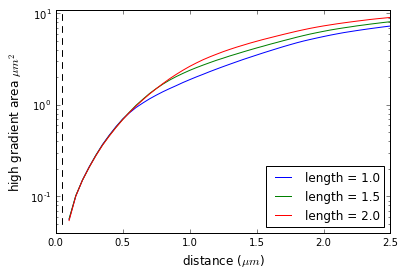

In [21]:
f = plt.figure()
for length in [1.0, 1.5, 2.0]:
    [x_positions, maxG, area] = np.loadtxt(os.path.join(target_folder, 'magnet_{:0.1f}um_max_gradient.csv'.format(length)),delimiter=',')

    plt.semilogy(np.array(x_positions), area, label = 'length = {:0.1f}'.format(length))
    plt.plot([config['magnet_dimensions_um']['height']/2, config['magnet_dimensions_um']['height']/2], [5e-2, 10], 'k--')
plt.xlabel('distance ($\mu m$)')
plt.ylabel('high gradient area $\mu m^2$')
plt.ylim([4e-2, 11])
plt.xlim([0, max(x_positions)])
plt.legend(loc = 4)


# plt.plot(np.array(x_positions), area)
# plt.plot([config['magnet_dimensions_um']['height']/2, config['magnet_dimensions_um']['height']/2], [1e-3, 2.5], 'k--')
# plt.xlabel('distance ($\mu m$)')
# plt.ylabel('high gradient area $\mu m^2$')
f.savefig(os.path.join(target_folder, 'magnet_high_gradient_area.pdf'))

In [6]:
config

{'magnet_dimensions_um': {'height': 0.1, 'length': 2.0, 'width': 0.3},
 'magnet_material_parameters': {'atom_mass_dalton': 58.9,
  'density_kg/m^3': 8900.0,
  'g_factor': 1.6},
 'number_of_dipoles': {'nx': 8, 'ny': 16, 'nz': 80},
 'unit_vector_magnet': [0.0, 0.0, 1.0],
 'unit_vector_motion': [1.0, 0.0, 0.0],
 'unit_vector_spin': [0.5773815451999803,
  0.5773815451999803,
  -0.5772877120855477]}

# create 2D plots form existing data

current height 0.1 / 2.5
2016-09-20 19:33:15.454867 saving figure
current height 0.15 / 2.5
current height 0.2 / 2.5
current height 0.25 / 2.5
current height 0.3 / 2.5
current height 0.35 / 2.5
current height 0.4 / 2.5
current height 0.45 / 2.5
current height 0.5 / 2.5
2016-09-20 19:33:18.072493 saving figure
current height 0.55 / 2.5
current height 0.6 / 2.5
current height 0.65 / 2.5
current height 0.7 / 2.5
current height 0.75 / 2.5
current height 0.8 / 2.5
current height 0.85 / 2.5
current height 0.9 / 2.5
current height 0.95 / 2.5
current height 1.0 / 2.5
2016-09-20 19:33:20.705815 saving figure
current height 1.05 / 2.5
current height 1.1 / 2.5
current height 1.15 / 2.5
current height 1.2 / 2.5
current height 1.25 / 2.5
current height 1.3 / 2.5
current height 1.35 / 2.5
current height 1.4 / 2.5
current height 1.45 / 2.5
current height 1.5 / 2.5
2016-09-20 19:33:23.296089 saving figure
current height 1.55 / 2.5
current height 1.6 / 2.5
current height 1.65 / 2.5
current height 1.7 /

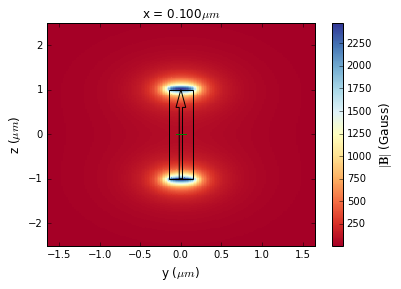

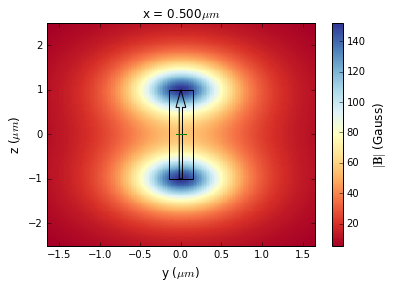

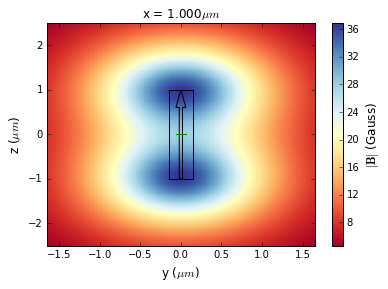

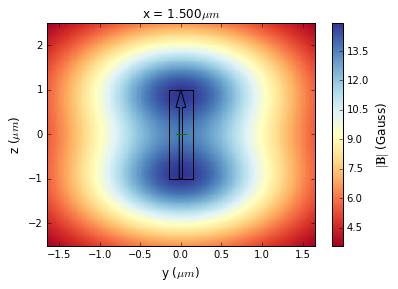

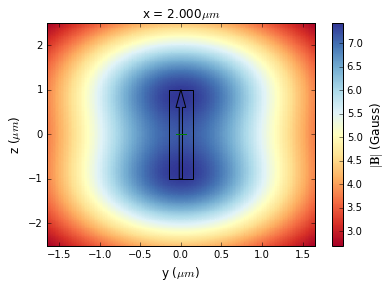

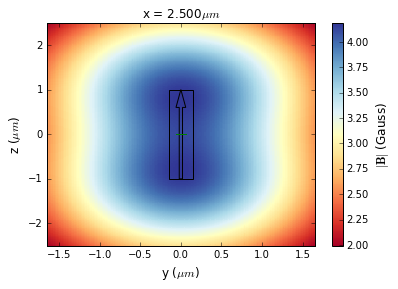

In [2]:
target_folder = './calc_results/magnet'

x_positions = np.arange(0.1, 2.55,0.05)

x_positions_plot = np.array([ 0.1,  0.5,  1.0,  1.5,  2.0, 2.5])

margins = {
#     'a1':{'left': -0.1, 'right': 0.1},
    'a1':{'left': -0.1, 'right': 1.0},
    'a2':{'left':1.5, 'right':1.5},
    'a3':{'left':1.5, 'right':1.5},
    'dx': 2e-2
}

config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']


for length in [2.0]:
    
    maxG = []
    area = []
    
    config['magnet_dimensions_um']['length'] = length
    for height in x_positions:
        print('current height',height, '/', x_positions[-1])

        # calculate
        margins.update({'a1':height})
        filename = os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um.csv'.format(length,height))
        df = pd.read_csv(filename, index_col = 0)


        # plot
        if min(abs(height-x_positions_plot))<1e-10:
#             for field in ['Bfield_mag', 'Bfield_proj', 'Gradient','Bfield_perp']:
            for field in ['Bfield_mag']:
                print(datetime.datetime.now(), 'saving figure')
                f = plot_fields_in_plane('x', df, height, field, config)
                f.savefig(os.path.join(target_folder, '{:s}_length_{:0.1f}um_x_{:03.0f}nm.jpg'.format(field, config['magnet_dimensions_um']['length'], 1e3*height)))
                
#     data = np.array([x_positions, maxG, area])
#     filename = os.path.join(target_folder, 'magnet_{:0.1f}um_max_gradient.csv'.format(config['magnet_dimensions_um']['length']))
#     np.savetxt(filename,data,delimiter=',')

# plot a single plot

In [19]:
config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']

length = 2.0
height = 0.5

filename = os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um.csv'.format(length,height))
df = pd.read_csv(filename, index_col = 0)

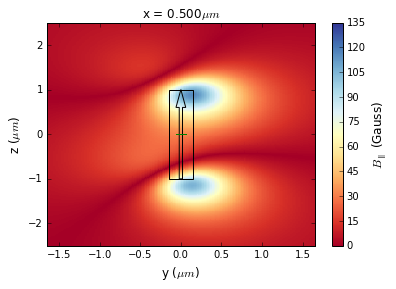

In [27]:
config['magnet_dimensions_um']['length'] = length
field = 'Bfield_par'
f = plot_fields_in_plane('x', df, height, field,config, colorbar_limits=(0,135), abs_value=True)

f.savefig(os.path.join(target_folder, '{:s}_length_{:0.1f}um_x_{:03.0f}nm_abs.jpg'.format(field, config['magnet_dimensions_um']['length'], 1e3*height)))

#  plot 2D with colorbar limited to 10Gauss

In [18]:
config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']

length = 2.0
height = 0.5

filename = os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um.csv'.format(length,height))
df = pd.read_csv(filename, index_col = 0)

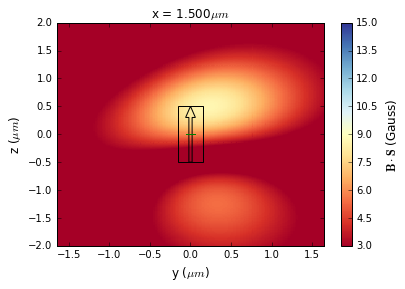

In [16]:
config['magnet_dimensions_um']['length'] = length
f = plot_fields_in_plane('x', df, height, 'Bfield_proj',config, colorbar_limits=(3,15), abs_value=True)

f.savefig(os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um_Blim_3.jpg'.format(length,height)))

In [5]:
def getB_proj(df, s, a1 = 'y', a2 = 'z'):
    A1, A2 = df[a1].as_matrix(), df[a2].as_matrix()
    N1, N2 = len(set(A1)), len(set(A2))
    Bx, By, Bz = df['Bx'].as_matrix(),df['By'].as_matrix(),df['Bz'].as_matrix()
    D = 10**4*np.reshape(Bx*s[0]+By*s[1]+ Bz*s[2], (N1, N2))

    A1 = np.reshape(A1, (N1, N2))
    A2 = np.reshape(A2, (N1, N2))

    D = np.reshape(D, (N1, N2))
    return D

In [30]:
len(D[D>10])*margins['dx']**2, len(D.flatten())*margins['dx']**2

(3.9272, 15.006400000000001)

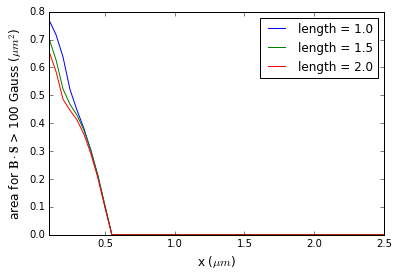

In [30]:
f = plt.figure()
# 'x'
a1, a2 = 'y', 'z'
s = config['unit_vector_spin']
dx = 0.02
margins = {
#     'a1':{'left': -0.1, 'right': 0.1},
    'a1':{'left': -0.1, 'right': 1.0},
    'a2':{'left':1.5, 'right':1.5},
    'a3':{'left':1.5, 'right':1.5},
    'dx': 2e-2
}

B_lim = 100 # min B field in Gauss

x_positions = np.arange(0.1, 2.55,0.05)

config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']

length = 1.5
height = 0.5
for length in [1.0, 1.5, 2.0]:
    area = []
    for height in x_positions:
        filename = os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um.csv'.format(length,height))
        df = pd.read_csv(filename, index_col = 0)

        D = getB_proj(df, s, a1 = 'y', a2 = 'z')

        area.append(len(D[D>B_lim])*dx**2)

    plt.plot(x_positions, area, label = 'length = {:0.1f}'.format(length))

    data = np.array([x_positions, area])
    filename = os.path.join(target_folder, 'magnet_{:0.1f}um_area{:02d}.csv'.format(config['magnet_dimensions_um']['length'], B_lim))
    np.savetxt(filename,data,delimiter=',')

label  = 'area for $\mathbf{B}\cdot \mathbf{S}$ > '+'{:d}'.format(B_lim)+' Gauss ($\mu m^2$)'
plt.xlabel('{:s} ($\mu m$)'.format('x'))
plt.ylabel(label)
plt.legend(loc = 1)
plt.xlim([min(x_positions), max(x_positions)])
f.savefig(os.path.join(target_folder, 'magnet_Blim{:02d}_area.pdf'.format(B_lim)))

(0.10000000000000001, 2.5000000000000009)

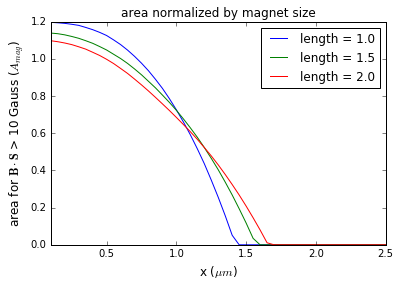

In [19]:
# 'x'
a1, a2 = 'y', 'z'
s = config['unit_vector_spin']
dx = 0.02
margins = {
#     'a1':{'left': -0.1, 'right': 0.1},
    'a1':{'left': -0.1, 'right': 1.0},
    'a2':{'left':1.5, 'right':1.5},
    'a3':{'left':1.5, 'right':1.5},
    'dx': 2e-2
}

B_lim = 3 # min B field in Gauss

x_positions = np.arange(0.1, 2.55,0.05)

config = json.loads(open('{:s}'.format(PARAMETER_FILE)).read())
config = config['CoBarMagnet_z_motion_x']

length = 1.5
height = 0.5
for length in [1.0, 1.5, 2.0]:
    area = []
    for height in x_positions:
        filename = os.path.join(target_folder, 'magnet_{:0.1f}um_height_{:0.3f}um.csv'.format(length,height))
        df = pd.read_csv(filename, index_col = 0)

        D = getB_proj(df, s, a1 = 'y', a2 = 'z')

        area.append(len(D[D>B_lim])*dx**2)

    plt.plot(x_positions, area / (length*height), label = 'length = {:0.1f}'.format(length))

#     data = np.array([x_positions, area])
#     filename = os.path.join(target_folder, 'magnet_{:0.1f}um_area{:02d}.csv'.format(config['magnet_dimensions_um']['length'], B_lim))
#     np.savetxt(filename,data,delimiter=',')

label  = 'area for $\mathbf{B}\cdot \mathbf{S}$ > '+'{:d}'.format(B_lim)+' Gauss ($A_{mag}$)'
plt.xlabel('{:s} ($\mu m$)'.format('x'))
plt.ylabel(label)
plt.title('area normalized by magnet size')
plt.legend(loc = 3)
plt.xlim([min(x_positions), max(x_positions)])